# Drug Consumption Final Project for COMP 562 - Random Forest Methods
#### by Samantha Anthony

## Import Libraries and Data

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier




drug_labels = ['Alcohol','Amphet','Amyl','Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']
sched_1 = ['Heroin','LSD','Ecstasy','Mushrooms']
sched_2 = ['Amphet','Coke','Crack','Meth']
sched_3 = ['Ketamine']
sched_4 = ['Benzos']
not_controlled_substance = ['Alcohol','Amyl','Caff','Choc','Legalh','Nicotine','VSA']
schedules = ['Sch1','Sch2','Sch3','Sch4', 'SchNA']
personality_labels = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
demographic_labels = ['Age','Gender','Education','Country','Ethnicity']
target_label = ['Cannabis']

In [4]:
drugs = pd.read_csv('drugs.csv')
print(drugs.shape)
drugs.head()

(1877, 35)


Age  Gender                          Education Country  \
0  35-44       1  Professional certificate/ diploma      UK   
1  25-34       0                   Doctorate degree      UK   
2  35-44       0  Professional certificate/ diploma      UK   
3  18-24       1                     Masters degree      UK   
4  35-44       1                   Doctorate degree      UK   

           Ethnicity  Nscore  Escore  Oscore  Ascore  Cscore  ...  LSD  Meth  \
0  Mixed-White/Asian    39.0    36.0    42.0    37.0    42.0  ...    0     0   
1              White    29.0    52.0    55.0    48.0    41.0  ...    1     1   
2              White    31.0    45.0    40.0    32.0    34.0  ...    0     0   
3              White    34.0    34.0    46.0    47.0    46.0  ...    0     0   
4              White    43.0    28.0    43.0    41.0    50.0  ...    0     0   

   Mushrooms  Nicotine  VSA  Sch1  Sch2 Sch3  Sch4  SchNA  
0          0         1    0     0     1    0     1      1  
1          0         1    0     1     1    1     0      1  
2          1         0    0     1     0    0     0      1  
3          0         1    0     0     1    1     1      1  
4          1         1    0     1     1    0     0      1  

[5 rows x 35 columns]

## Data Exploration

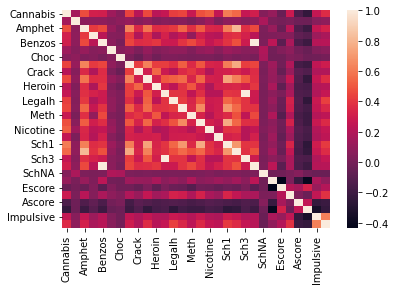

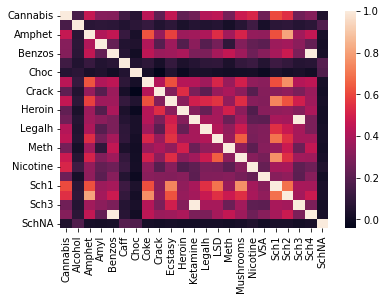

          Cannabis      Sch1      Sch2      Sch3      Sch4     SchNA
Cannabis  1.000000  0.607735  0.547054  0.255704  0.304623  0.043469
Sch1      0.607735  1.000000  0.689854  0.391722  0.384322  0.028940
Sch2      0.547054  0.689854  1.000000  0.379982  0.475426  0.027410
Sch3      0.255704  0.391722  0.379982  1.000000  0.284601  0.011805
Sch4      0.304623  0.384322  0.475426  0.284601  1.000000  0.021645
SchNA     0.043469  0.028940  0.027410  0.011805  0.021645  1.000000


Cannabis   Alcohol    Amphet      Amyl    Benzos      Caff  \
Cannabis   1.000000  0.154013  0.463053  0.306935  0.304623  0.130247   
Alcohol    0.154013  1.000000  0.072153  0.080454  0.076666  0.051930   
Amphet     0.463053  0.072153  1.000000  0.410257  0.455464  0.107491   
Amyl       0.306935  0.080454  0.410257  1.000000  0.225814  0.051508   
Benzos     0.304623  0.076666  0.455464  0.225814  1.000000  0.068419   
Caff       0.130247  0.051930  0.107491  0.051508  0.068419  1.000000   
Choc       0.059199  0.076327  0.028102  0.043274  0.007989  0.053218   
Coke       0.437168  0.104226  0.628132  0.410818  0.443611  0.081854   
Crack      0.210596  0.053042  0.346005  0.190223  0.357499  0.021783   
Ecstasy    0.455868  0.081930  0.584920  0.366293  0.371107  0.101753   
Heroin     0.217370  0.032803  0.362527  0.181242  0.398672  0.037651   
Ketamine   0.255704  0.058398  0.375249  0.319491  0.284601  0.061769   
Legalh     0.419041  0.047677  0.404067  0.190139  0.283142  0.084286   
LSD        0.443584  0.058994  0.535882  0.266142  0.388256  0.086957   
Meth       0.266510  0.018609  0.373343  0.090363  0.454405  0.036768   
Mushrooms  0.476163  0.062782  0.507976  0.301294  0.366307  0.097416   
Nicotine   0.517491  0.130199  0.340882  0.224999  0.249925  0.115639   
VSA        0.253552  0.023944  0.331993  0.204404  0.311762  0.054668   

               Choc      Coke     Crack   Ecstasy    Heroin  Ketamine  \
Cannabis   0.059199  0.437168  0.210596  0.455868  0.217370  0.255704   
Alcohol    0.076327  0.104226  0.053042  0.081930  0.032803  0.058398   
Amphet     0.028102  0.628132  0.346005  0.584920  0.362527  0.375249   
Amyl       0.043274  0.410818  0.190223  0.366293  0.181242  0.319491   
Benzos     0.007989  0.443611  0.357499  0.371107  0.398672  0.284601   
Caff       0.053218  0.081854  0.021783  0.101753  0.037651  0.061769   
Choc       1.000000  0.019347 -0.043873  0.046356 -0.014824  0.026723   
Coke       0.019347  1.000000  0.418188  0.619460  0.422541  0.419474   
Crack     -0.043873  0.418188  1.000000  0.301460  0.536460  0.280621   
Ecstasy    0.046356  0.619460  0.301460  1.000000  0.318229  0.491837   
Heroin    -0.014824  0.422541  0.536460  0.318229  1.000000  0.306077   
Ketamine   0.026723  0.419474  0.280621  0.491837  0.306077  1.000000   
Legalh     0.028226  0.369824  0.202860  0.519502  0.231902  0.384543   
LSD        0.014755  0.517056  0.355576  0.553173  0.381512  0.386360   
Meth       0.006953  0.355603  0.397751  0.335369  0.495491  0.243029   
Mushrooms  0.010369  0.495465  0.325044  0.538276  0.321554  0.372412   
Nicotine   0.016708  0.331358  0.189550  0.314622  0.176012  0.208961   
VSA       -0.007418  0.318893  0.305624  0.301445  0.313258  0.207029   

             Legalh       LSD      Meth  Mushrooms  Nicotine       VSA  
Cannabis   0.419041  0.443584  0.266510   0.476163  0.517491  0.253552  
Alcohol    0.047677  0.058994  0.018609   0.062782  0.130199  0.023944  
Amphet     0.404067  0.535882  0.373343   0.507976  0.340882  0.331993  
Amyl       0.190139  0.266142  0.090363   0.301294  0.224999  0.204404  
Benzos     0.283142  0.388256  0.454405   0.366307  0.249925  0.311762  
Caff       0.084286  0.086957  0.036768   0.097416  0.115639  0.054668  
Choc       0.028226  0.014755  0.006953   0.010369  0.016708 -0.007418  
Coke       0.369824  0.517056  0.355603   0.495465  0.331358  0.318893  
Crack      0.202860  0.355576  0.397751   0.325044  0.189550  0.305624  
Ecstasy    0.519502  0.553173  0.335369   0.538276  0.314622  0.301445  
Heroin     0.231902  0.381512  0.495491   0.321554  0.176012  0.313258  
Ketamine   0.384543  0.386360  0.243029   0.372412  0.208961  0.207029  
Legalh     1.000000  0.414624  0.332041   0.479404  0.285745  0.294863  
LSD        0.414624  1.000000  0.349515   0.647848  0.277596  0.300925  
Meth       0.332041  0.349515  1.000000   0.324064  0.208606  0.310674  
Mushrooms  0.479404  0.647848  0.324064   1.000000  0.310377  0.271

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
explore = drugs.copy()
explore['Cannabis'] = np.where((explore['Cannabis'] == 'CL0'), 0, 1)
explore = explore.astype({'Cannabis':int})
explore = explore[target_label + drug_labels + schedules + personality_labels]
sns.heatmap(explore.corr());
plt.show()
explore = explore[target_label + drug_labels + schedules]
sns.heatmap(explore.corr());
plt.show()
print(explore[target_label + schedules].corr())
explore[target_label + drug_labels].corr()

## Generate Datasets
data(sch=False, encode='none', bin_out=True, val=False)
- sch: False for individual drugs, True if using drug schedules
- encode: 'onehot' for one-hot encoding categorical (previously 2), 'label' for label encoding categorical (previously 3), 'none' for no encoding
- bin_out: True for binary outputs of weed users, False for all 7 categories of weed users
- val: False does not include a validation set, True does

In [77]:
y = drugs['Cannabis']
X = drugs.drop(target_label, 1)

def data(sch=False, encode='none', bin_out=True, val=False):
    if(sch):
        X_data = X.drop(drug_labels, 1)
    else:
        X_data = X.drop(schedules, 1)
    
    if(encode == 'onehot'):
        X_data = pd.get_dummies(X_data, columns=(demographic_labels))
    elif(encode == 'label'):
        for i in demographic_labels:
            X_data[i] = X_data[i].astype('category')
            X_data[i] = X_data[i].cat.codes
    else:
        for i in demographic_labels:
            X_data[i] = X_data[i].astype('category')
    
    if(val):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y, train_size=0.8)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2)
        
    if(bin_out):
        y_train = np.where((y_train == 'CL0'), 0, 1)
        y_test = np.where((y_test == 'CL0'), 0, 1)
        if(val):
            y_val = np.where((y_val == 'CL0'), 0, 1)
            return X_train, X_val, X_test, y_train, y_val, y_test
        else:
            return X_train, X_test, y_train, y_test
    else:
        if(val):
            return X_train, X_val, X_test, y_train, y_val, y_test
        else:
            return X_train, X_test, y_train, y_test

## Random Forest

- Base model of 1 Decision Tree: 0.81 accuracy, AUC 0.75
- Random Forest: 0.89 accuracy, AUC 0.94

In [106]:
X_train, X_test, y_train, y_test = data(encode='onehot')

##### Single Decision Tree

In [85]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
print(f'Model Accuracy: {tree.score(X_train, y_train)}')
print("Accuracy:", tree.score(X_test, y_test))
roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])

Model Accuracy: 1.0
Accuracy: 0.8297872340425532


0.7506014434643142

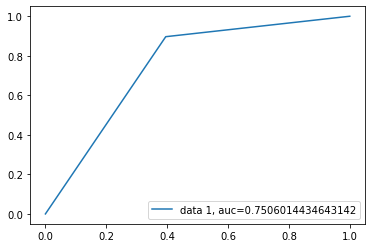

In [86]:
y_pred_proba = tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Random Forest

In [107]:
model = RandomForestClassifier(n_estimators=100, bootstrap = True, class_weight = 'balanced_subsample', max_features = 'sqrt')
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]
print("Accuracy:", model.score(X_test, y_test))
print(confusion_matrix(y_test, rf_predictions))

roc_value = roc_auc_score(y_test, rf_probs)
print("AUC", roc_value)

Accuracy: 0.8696808510638298
[[ 59  30]
 [ 19 268]]
AUC 0.9372235054613789


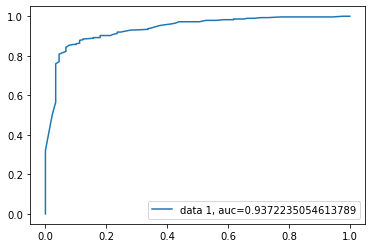

In [108]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
RANDOM_STATE = 123

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features=None,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            max_features="sqrt",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

##  XGBoost Model
Accuracy = 0.87 - Redo Later

#### This model uses only the drug schedules to predict a binary output of weed user
Accuracy = 0.86

C:\Users\saman\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\saman\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:25:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 86.17%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

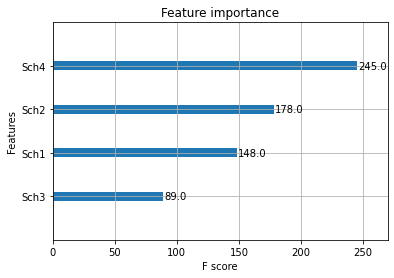

In [100]:
model = xgb.XGBClassifier()
model.fit(X_train_sch[schedules], y_bin_train)
y_pred = model.predict(X_test_sch[schedules])
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_bin_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
xgb.plot_importance(model)

#### This model uses the drug labels to predict the binary type of weed user
Accuracy = 0.87

C:\Users\saman\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\saman\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:27:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 87.23%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

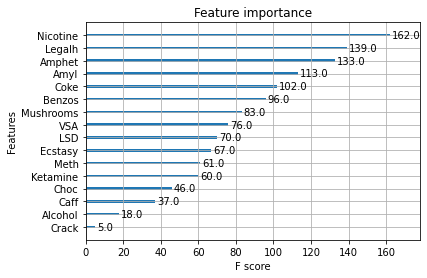

In [104]:
model = xgb.XGBClassifier()
model.fit(X_train[drug_labels], y_bin_train)
y_pred = model.predict(X_test[drug_labels])
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_bin_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
xgb.plot_importance(model)

#### This model uses the drug labels to predict the 7 classifications of weed user
Accuracy = 0.36

C:\Users\saman\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\saman\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:33:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 36.17%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

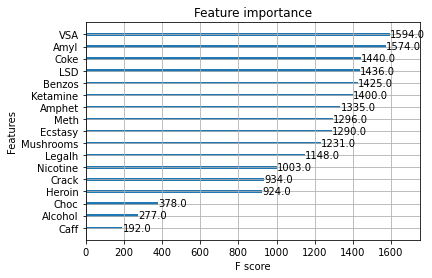

In [110]:
model = xgb.XGBClassifier()
model.fit(X_train[drug_labels], y_train)
y_pred = model.predict(X_test[drug_labels])
accuracy = np.sum(y_pred == y_test) / y_pred.shape[0]
print("Accuracy: %.2f%%" % (accuracy * 100.0))
xgb.plot_importance(model)

#### This model uses the one-hot encoded data (2) to predict 7 weed user classes
Accuracy = 0.40

#### This model uses the one-hot encoded data (2) to predict binary weed user
Accuracy = 0.88

[21:42:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 87.77%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

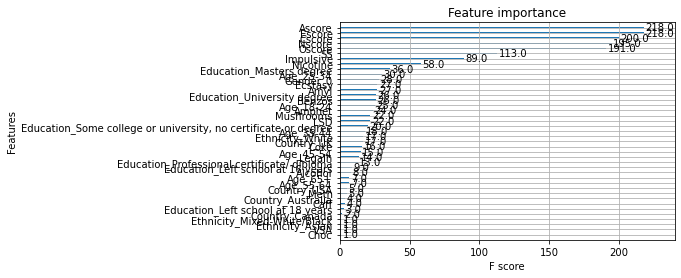

In [118]:
model = xgb.XGBClassifier()
model.fit(X_train2, y_bin_train)
y_pred = model.predict(X_test2)
accuracy = np.sum(y_pred == y_bin_test) / y_pred.shape[0]
print("Accuracy: %.2f%%" % (accuracy * 100.0))
xgb.plot_importance(model)

#### 

#### 

## Naive Bayes Models
Accuracy = 0.86

#### This first model uses the entire dataset (one-hot encoded X2) to predict which of the 7 classes of weed user (y) each participant is
Accuracy = 0.28

In [135]:
gnb = GaussianNB().fit(X_train2, y_train2)
gnb_predictions = gnb.predict(X_test2)
accuracy = gnb.score(X_test2, y_test2)
print(accuracy)
cm = confusion_matrix(y_test2, gnb_predictions)
cm

0.28191489361702127


array([[27,  6,  0,  1,  0,  2,  0],
       [ 8,  5,  0,  2,  0,  2,  0],
       [ 5,  6,  0,  2,  2, 14,  0],
       [ 1,  2,  0,  4,  0, 15,  0],
       [ 0,  2,  0,  0,  2, 11,  0],
       [ 0,  1,  1,  2,  0, 15,  0],
       [ 0,  1,  1,  2,  7, 39,  0]], dtype=int64)

It appears that a Naive Bayes Model on this many outputs, with one-hot encoded variables, is not very accurate of a predictor of the 7 weed user types.

####  This second model uses the entire dataset (label encoded X3) to predict which of the 7 classes of weed user (y) each participant is
Accuracy = 0.28

In [137]:
gnb = GaussianNB().fit(X_train3, y_train3)
gnb_predictions = gnb.predict(X_test3)
accuracy = gnb.score(X_test3, y_test3)
print(accuracy)
cm = confusion_matrix(y_test3, gnb_predictions)
cm

0.2765957446808511


array([[36,  0,  0,  0,  0,  0,  0],
       [ 9,  2,  1,  0,  5,  0,  0],
       [ 6,  5,  1,  0, 17,  0,  0],
       [ 1,  2,  0,  0, 19,  0,  0],
       [ 2,  0,  0,  0, 13,  0,  0],
       [ 0,  1,  0,  0, 18,  0,  0],
       [ 0,  2,  1,  0, 47,  0,  0]], dtype=int64)

#### This third model looks at the label encoded dataset (X3) to predict which of two classes of weed user (y_bin) each participant is
Accuracy = 0.85

In [108]:
gnb = GaussianNB().fit(X_train3, y_bin_train3)
gnb_predictions = gnb.predict(X_test3)
accuracy = gnb.score(X_test3, y_bin_test3)
print(accuracy)
cm = confusion_matrix(y_bin_test3, gnb_predictions)
cm

0.8457446808510638


array([[ 36,   0],
       [ 29, 123]], dtype=int64)

#### This fourth model uses only the other drugs (X[drug_labels]) to predict which of two classes of weed user (y_bin) each participant is
Accuracy = 0.86

In [148]:
clf = CategoricalNB().fit(X_train[drug_labels], y_bin_train)
clf_predictions = clf.predict(X_test[drug_labels])
accuracy = clf.score(X_test[drug_labels], y_bin_test)
print(accuracy)
cm = confusion_matrix(y_bin_test, clf_predictions)
cm

0.8563829787234043


array([[ 36,   0],
       [ 27, 125]], dtype=int64)

This shows that when using the Naive Bayes model, the demographic data is not contributing much to the model, and the drugs are a better predictor.

#### This fifth model uses only the scheduling (X_sch) to predict which of two classes of weed user (y_bin) each participant is
Accuracy = 0.86

In [173]:
clf = CategoricalNB().fit(X_train_sch[schedules], y_bin_train)
clf_predictions = clf.predict(X_test_sch[schedules])
accuracy = clf.score(X_test_sch[schedules], y_bin_test)
print(accuracy)
cm = confusion_matrix(y_bin_test, clf_predictions)
cm

0.8617021276595744


array([[ 36,   0],
       [ 26, 126]], dtype=int64)

#### Overall, it seems that the most accurate Naive Bayes model was using the schedule class of drugs  to predict the binary output of whether or not a person is a weed user (~0.86 accuracy). This will be used as a baseline for comparing the effectiveness of the other models.

In [179]:
imps = permutation_importance(clf, X_train_sch[schedules], y_bin_train)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_sch[schedules].shape[1]):
    print("%d. %s (%f)" % (f + 1, schedules[indices[f]], importances[indices[f]]))

Feature ranking:
1. Sch1 (0.075017)
2. Sch2 (0.059161)
3. Sch3 (0.013458)
4. SchNA (0.000000)
5. Sch4 (0.000000)


Using permutation importance, we can determine from this model that using a Schedule 1 drug was the biggest predictor of being a weed user, followed by Schedule 2 and Schedule 3.

## KNN
Accuracy = 0.89

In [352]:
X_train, X_test, y_train, y_test = data(sch=True)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train[schedules], y_train)
predictions = neigh.predict(X_test[schedules])
neigh.score(X_test[schedules], y_test)

0.848404255319149

In [359]:
X_train, X_test, y_train, y_test = data(encode='label')
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train[drug_labels+demographic_labels], y_train)
neigh.score(X_test[drug_labels+demographic_labels], y_test)

0.8670212765957447

In [371]:
X_train, X_test, y_train, y_test = data()
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train[drug_labels], y_train)
neigh.score(X_test[drug_labels], y_test)

0.8856382978723404